In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests

df = pd.read_csv('datasets/minimum_wage_data.csv')
df = df.copy()
df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [13]:
act_min_wage = pd.DataFrame()

for name, group in df.groupby('State'):
    
    if act_min_wage.empty:
        act_min_wage = group.set_index('Year')[['Effective.Minimum.Wage.2020.Dollars']].rename(columns = {'Effective.Minimum.Wage.2020.Dollars': name})
    else:
        act_min_wage = act_min_wage.join(group.set_index('Year')[['Effective.Minimum.Wage.2020.Dollars']].rename(columns = {'Effective.Minimum.Wage.2020.Dollars': name}))
        
act_min_wage.head(7)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,8.55,15.61,8.55,8.55,12.26,8.55,10.41,9.29,9.29,8.55,...,8.55,8.55,8.55,8.55,10.41,8.55,11.89,8.55,9.29,8.92
1969,8.11,14.80,8.11,8.11,11.63,8.11,9.87,8.81,8.81,8.11,...,8.11,8.11,8.11,8.11,9.87,8.11,11.28,8.11,8.81,8.46
1970,8.67,14.00,8.67,8.67,11.00,8.67,10.67,8.67,10.67,8.67,...,8.67,8.67,8.67,8.67,10.67,8.67,10.67,8.67,8.67,8.67
1971,8.30,13.41,8.30,8.30,10.54,8.30,10.22,8.30,10.22,8.30,...,8.30,8.30,8.30,8.30,10.22,8.30,10.22,8.30,8.30,8.30
1972,9.90,12.99,9.90,9.90,10.21,9.90,11.45,9.90,9.90,9.90,...,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90,9.90
1973,9.32,12.23,9.32,9.32,9.61,9.32,10.78,9.32,9.32,9.32,...,9.32,9.32,9.32,9.32,9.32,9.32,9.32,9.32,9.32,9.32
1974,8.39,11.02,8.39,8.39,8.66,8.39,9.71,8.39,8.39,8.39,...,8.39,8.39,8.39,8.39,8.39,8.39,8.39,8.39,8.39,8.39


In [14]:
min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis = 1).corr()

In [15]:
min_wage_corr.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,1.000000,0.620364,0.494796,0.815863,0.281291,0.506270,0.380878,0.714823,0.183245,0.843128,...,1.000000,1.000000,0.747871,1.000000,0.372679,1.000000,0.139595,0.853105,0.944593,0.997126
Alaska,0.620364,1.000000,0.441018,0.619306,0.668420,0.444483,0.646909,0.646148,0.332957,0.589012,...,0.620364,0.620364,0.501587,0.620364,0.615675,0.620364,0.479309,0.612712,0.697198,0.658431
Arizona,0.494796,0.441018,1.000000,0.885807,0.732276,0.994981,0.688033,0.717137,0.820889,0.755036,...,0.494796,0.494796,0.742403,0.494796,0.752045,0.494796,0.715554,0.816156,0.486170,0.489279
Arkansas,0.815863,0.619306,0.885807,1.000000,0.619974,0.892103,0.636162,0.831495,0.617050,0.904296,...,0.815863,0.815863,0.863931,0.815863,0.662473,0.815863,0.517583,0.954115,0.798220,0.811273
California,0.281291,0.668420,0.732276,0.619974,1.000000,0.738742,0.895479,0.736683,0.796175,0.547788,...,0.281291,0.281291,0.456079,0.281291,0.926371,0.281291,0.946904,0.577843,0.360438,0.308809


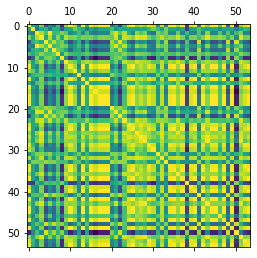

In [16]:
plt.matshow(min_wage_corr)

<ipython-input-17-00cdf22813e0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
<ipython-input-17-00cdf22813e0>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


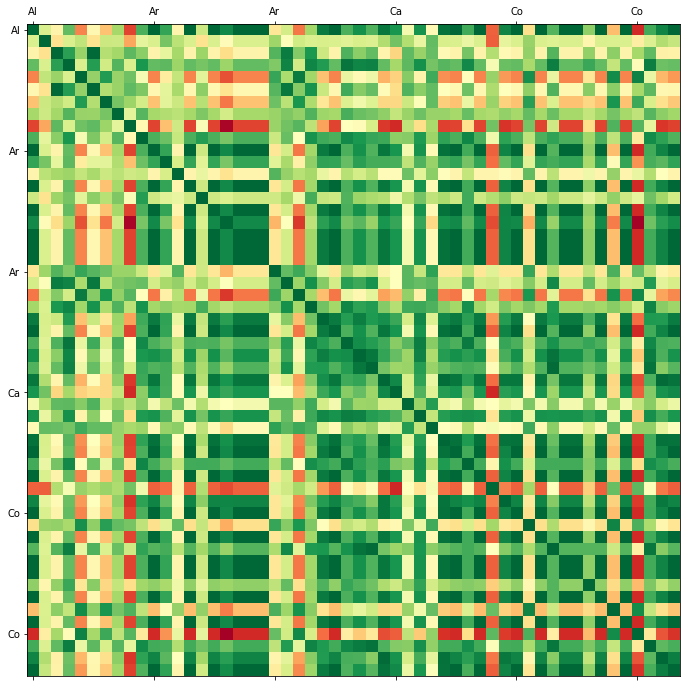

In [17]:
labels = [col[:2] for col in act_min_wage.columns]
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
ax.matshow(min_wage_corr, cmap = plt.cm.RdYlGn)

In [18]:
web = requests.get("https://www.infoplease.com/state-abbreviations-and-state-postal-codes")

dfs = pd.read_html(web.text)

ImportError: lxml not found, please install it

In [ ]:
states_abbv = dfs[0]
states_abbv.to_csv('states_abbv.csv', index = False)
states_abbv.set_index('Abbreviation', inplace = True)
states_abbv.head()

In [ ]:
states_dict = states_abbv[['Postal Code']].to_dict()
states_dict = states_dict['Postal Code']
states_dict

In [ ]:
states_dict['Guam'] = "GU"
states_dict['Puerto Rico'] = "PR"
labels = [states_dict[c] for c in min_wage_corr.columns]  # get abbv state names.